In [1]:
# started 9-28-2025

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Normalization

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [2]:
fires = pd.read_csv("fires_with_ndvi.csv")

In [3]:
fires = fires.sample(frac=1, random_state = 5)

In [4]:
fires = fires.dropna()

In [5]:
fires_data = fires[["FIRE_SIZE","temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi"]].copy()
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
2797,2.0,95.54,69,0.0,13.486638,1730.0
1790,3.3,93.20,67,0.0,7.271597,2349.0
186,340.0,82.76,72,0.0,8.949658,4448.0
2504,21.6,75.74,69,0.0,6.712244,2227.0
976,8.0,78.80,16,0.0,15.972654,4496.0
...,...,...,...,...,...,...
2121,47.0,80.78,84,0.0,8.328154,3307.0
1424,7.0,79.88,93,0.0,12.865134,4649.0
1725,78.8,102.74,50,0.0,7.147296,832.0
2254,110.0,93.92,60,0.0,7.022996,4583.0


In [6]:
fires_data["FIRE_SIZE"] = np.log10(fires_data["FIRE_SIZE"])

In [7]:
fires_data.describe()

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,1.102519,83.950462,68.572991,0.003940,8.033466,3166.863248
std,0.862425,11.233505,19.489743,0.020737,2.531750,1137.025054
min,0.301030,43.340000,9.000000,0.000000,2.548167,-3000.000000
25%,0.477121,76.820000,54.000000,0.000000,6.401492,2331.000000
50%,0.799341,85.100000,71.000000,0.000000,7.520199,3020.000000
75%,1.505150,91.940000,85.000000,0.000000,9.011809,3923.000000
max,5.380586,118.400000,100.000000,0.551181,28.589186,6407.000000


In [8]:
X = fires_data[["ndvi","windspeed_mph", "temp_max_F"]]
y = fires_data["FIRE_SIZE"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
power_cols = ["windspeed_mph"]
standard_cols = ["ndvi", "temp_max_F"]
# power_cols = ["precip_in", "windspeed_mph"]
# standard_cols = ["temp_max_F", "humidity_pct", "ndvi"]

In [11]:
std_scaler = StandardScaler()
pwr_scaler = PowerTransformer()

In [12]:
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[power_cols] = pwr_scaler.fit_transform(X_train[power_cols])


X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[power_cols] = pwr_scaler.transform(X_test[power_cols])

In [13]:
X_train

,ndvi,windspeed_mph,temp_max_F
1191,-0.594696,-1.150018,-2.274016
1990,0.445292,0.062601,-1.175576
2513,-0.982280,0.616342,0.455930
567,-0.249203,0.638840,-1.110962
2338,0.577702,0.329236,-0.270979
...,...,...,...
2579,-0.334261,0.476888,-1.272497
1381,0.134874,-0.141475,-0.448668
2639,0.992470,0.354448,-1.482493
596,-1.073477,-2.397094,1.021303


In [14]:
model = Sequential([
    Dense(64),
    LeakyReLU(negative_slope=0.1),
    

    Dense(128),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.2),
    
    Dense(128),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.3),
    Dense(128),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.2),
    
    
    Dense(32),
    LeakyReLU(negative_slope=0.1),
    
    Dense(32),
    LeakyReLU(negative_slope=0.1),
    
    Dense(1)
])

In [15]:
model.compile(optimizer="adam", loss="mae", metrics=["mae"])

In [16]:
history = model.fit(
    X_train["ndvi"],
    y_train,
    epochs=30,
    validation_split=0.2,
)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8190 - mae: 0.8190 - val_loss: 0.6247 - val_mae: 0.6247
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6205 - mae: 0.6205 - val_loss: 0.6233 - val_mae: 0.6233
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6144 - mae: 0.6144 - val_loss: 0.6199 - val_mae: 0.6199
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6174 - mae: 0.6174 - val_loss: 0.6143 - val_mae: 0.6143
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6142 - mae: 0.6142 - val_loss: 0.6164 - val_mae: 0.6164
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6315 - mae: 0.6315 - val_loss: 0.6138 - val_mae: 0.6138
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6023 - mae: 0.6023 - val_loss: 0.6079 - val_mae: 0.6079
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6225 - mae: 0.6225 - val_loss: 0.6165 - val_mae: 0.6165
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6410 - mae: 

In [18]:
loss = model.evaluate(X_test["ndvi"], y_test)
print(f"Test loss mae: {loss[1]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6709 - mae: 0.6709 
Test loss mae: 0.6578704118728638


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<Axes: ylabel='Count'>

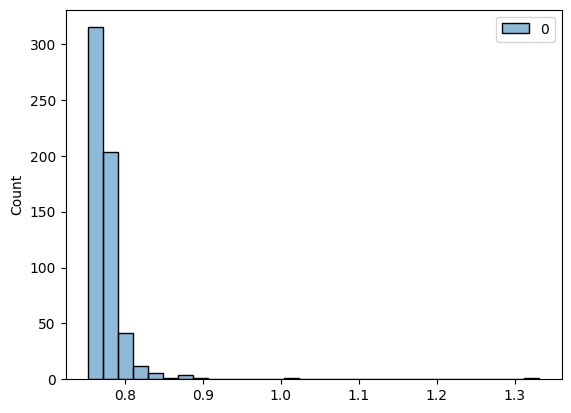

In [22]:
y_pred = model.predict(X_test["ndvi"])
sns.histplot(data=y_pred, bins=30, kde=False)


<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

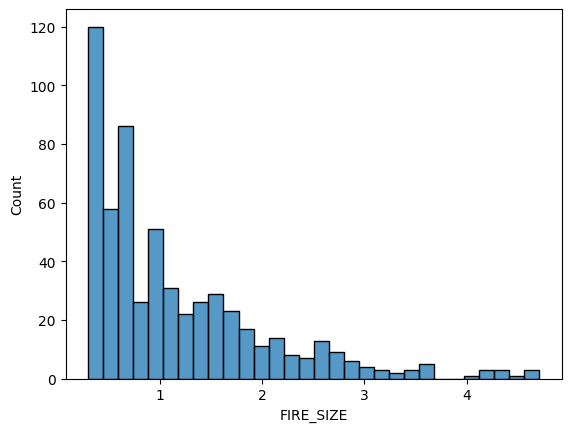

In [19]:
sns.histplot(data=y_test, bins=30, kde=False)
